In [51]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


Required **libraries**

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

Data Preprocessing 

In [53]:
Gasturbines_data = pd.read_csv("gas_turbines.csv")

In [54]:
Gasturbines_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [55]:
list(Gasturbines_data)

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

In [56]:
Gasturbines_data.shape

(15039, 11)

In [58]:
Gasturbines_data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [59]:
Gasturbines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


 Label Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Gasturbines_data['TEY'] = LE.fit_transform(Gasturbines_data['TEY'])

In [62]:
Gasturbines_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,707,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,709,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,708,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,709,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,709,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,491,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,508,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,352,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,406,10.533,6.2494,93.227


# split into input (X) and output (Y) variables

In [64]:
X = Gasturbines_data.drop("TEY",axis=1)

In [66]:
X.shape

(15039, 10)

In [67]:
Y = Gasturbines_data["TEY"]

In [72]:
Y

0        707
1        709
2        708
3        709
4        709
        ... 
15034    491
15035    508
15036    352
15037    406
15038    488
Name: TEY, Length: 15039, dtype: int64

 create model

In [73]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [75]:
model = Sequential()
model.add(Dense(45,input_dim=10,  activation='relu')) #input layer
model.add(Dense(1, activation='sigmoid')) #output layer

Compile model

In [78]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Fitting The Model

In [79]:
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 3s 2ms/step - loss: -18138445824.0000 - accuracy: 0.0000e+00 - val_loss: -17105912832.0000 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: -20506662912.0000 - accuracy: 0.0000e+00 - val_loss: -19286788096.0000 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: -23056496640.0000 - accuracy: 0.0000e+00 - val_loss: -21624270848.0000 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: -25773600768.0000 - accuracy: 0.0000e+00 - val_loss: -24104892416.0000 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 3s 3ms/step - loss: -28649500672.0000 - accuracy: 0.0000e+00 - val_loss: -26721959936.0000 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: -31677794304.0000 - accuracy: 0.0000e+00 - val_l

# Evaluate the model

In [80]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: -920651628544.0000 - accuracy: 6.6494e-05
accuracy: 0.01%


  Visualize training history

  list all data in history

In [82]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

 summarize history for accuracy

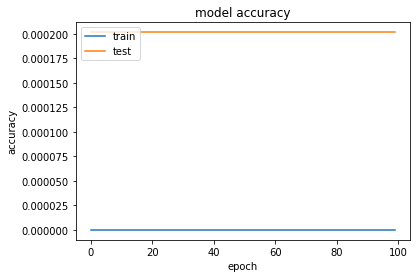

In [83]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

summarize history for loss

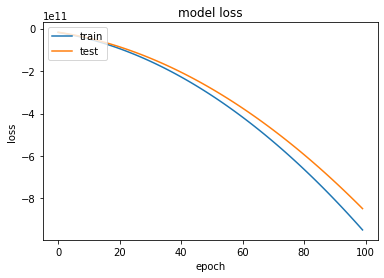

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Data set of gas_turbines.csv giving the results as:-->THE **TURBINE ENERGY YEILD(TEY)** IS 100%